In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(pd.read_excel('final_dataset.xlsx'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    S.No             480 non-null    float64
 1   bpm               480 non-null    float64
 2   sweat rate        480 non-null    float64
 3   skin temperature  480 non-null    float64
 4   time(min)         480 non-null    float64
 5   label             480 non-null    object 
 6   label No          480 non-null    float64
dtypes: float64(6), object(1)
memory usage: 26.4+ KB


In [4]:
df.describe()

,S.No,bpm,sweat rate,skin temperature,time(min),label No
count,480.000000,480.000000,480.000000,480.000000,480.0,480.0000
mean,240.500000,89.027083,359.795833,31.153125,5.0,1.5000
std,138.708327,15.654853,125.777366,1.590968,0.0,1.1192
min,1.000000,66.000000,120.000000,28.000000,5.0,0.0000
25%,120.750000,75.000000,255.000000,30.100000,5.0,0.7500
50%,240.500000,83.500000,370.000000,31.000000,5.0,1.5000
75%,360.250000,102.000000,470.250000,32.000000,5.0,2.2500
max,480.000000,123.000000,562.000000,34.500000,5.0,3.0000


In [5]:
df.columns

Index([' S.No', 'bpm', 'sweat rate', 'skin temperature', 'time(min)', 'label',
       'label No'],
      dtype='object')

In [6]:
df.shape

(480, 7)

In [7]:
df.head()

,S.No,bpm,sweat rate,skin temperature,time(min),label,label No
0,1.0,80.0,480.0,28.0,5.0,Happy,1.0
1,2.0,82.0,484.0,28.4,5.0,Happy,1.0
2,3.0,81.0,476.0,28.0,5.0,Happy,1.0
3,4.0,80.0,480.0,28.6,5.0,Happy,1.0
4,5.0,91.0,470.0,30.5,5.0,Happy,1.0


In [8]:
import seaborn as sns
sns.set(style="white", color_codes=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


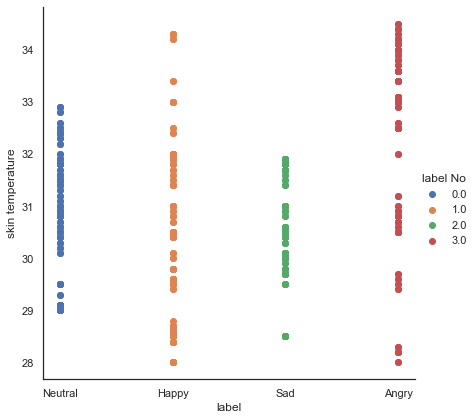

In [9]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "label", "skin temperature").add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


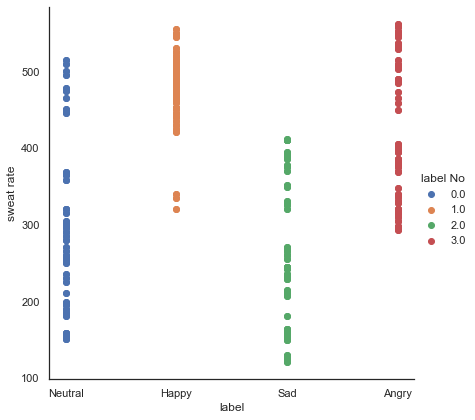

In [10]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "label", "sweat rate").add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


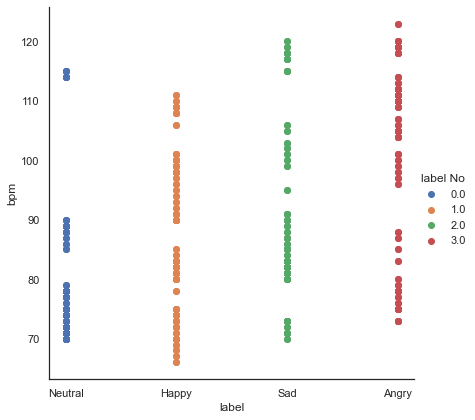

In [11]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "label", "bpm").add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


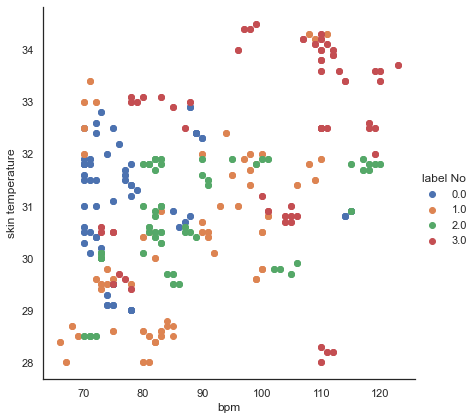

In [12]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "bpm", "skin temperature").add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


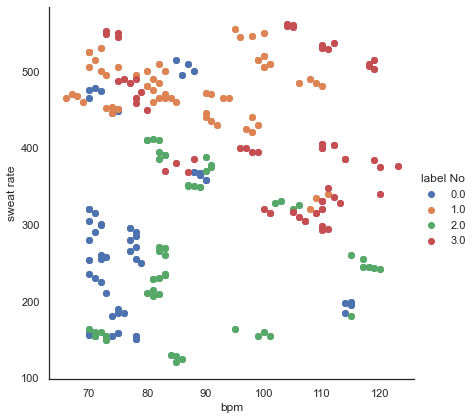

In [13]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "bpm", "sweat rate").add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


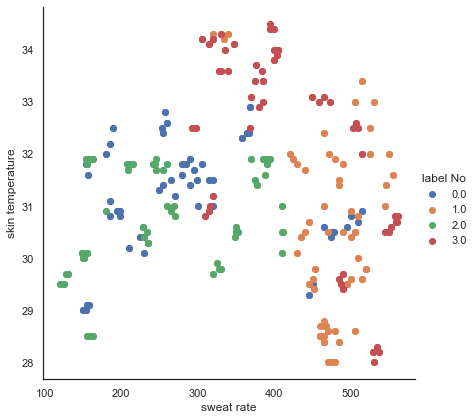

In [14]:
sns.FacetGrid(df, hue="label No",size=6).map(plt.scatter, "sweat rate", "skin temperature").add_legend()

In [15]:
df_n=pd.DataFrame()
df_n['bpm']=df['bpm']
df_n['skin temperature']=df['skin temperature']
df_n['sweat rate']=df['sweat rate']
df_n['label']=df['label']

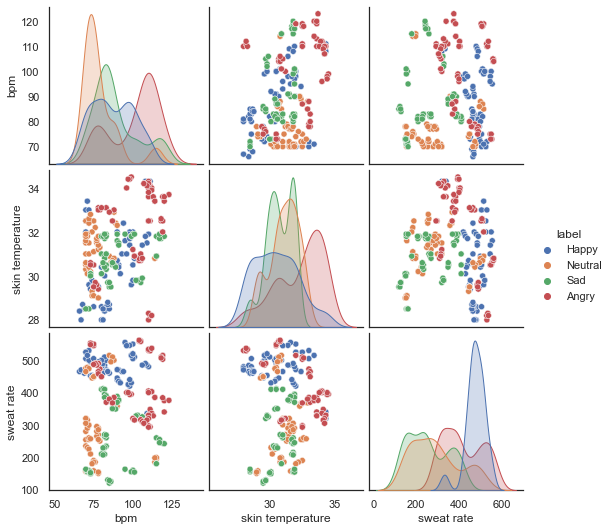

In [16]:
sns.pairplot(df_n, hue="label")

In [17]:
df['label'].value_counts()

Happy      120
Neutral    120
Sad        120
Angry      120
Name: label, dtype: int64

In [18]:
y = df['label No']

In [19]:
df = df.drop([' S.No','label','time(min)','label No'],axis = 1)

In [20]:
df.shape

(480, 3)

In [21]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
475    3.0
476    3.0
477    3.0
478    3.0
479    3.0
Name: label No, Length: 480, dtype: float64

In [22]:
X = df.iloc[:,:].values
y = y.values
print(X.shape)
print(y.shape)

(480, 3)
(480,)


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=37)

In [25]:
X_train.shape

(432, 3)

In [26]:
X_train

array([[-0.89695622,  0.70996266, -1.04015252],
       [ 1.85266154,  1.17157601,  0.91037923],
       [-1.40851301,  0.87709853, -1.9839582 ],
       ...,
       [-0.51328863, -1.15240845,  0.4070162 ],
       [-0.12962103,  0.06529574,  0.84745886],
       [ 1.98055074, -0.15755209,  1.53958302]])

In [59]:
model = Sequential()
model.add(Dense(72, input_dim=3, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(25,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(4, activation='softmax'))

In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
model.fit(X_train,y_train,epochs=200, batch_size=16)

Epoch 1/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9468
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9606
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9606
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9583
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9537
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9699
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9514
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9699
Epoch 9/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9769
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9630
Epoch 11/

In [74]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9583


[0.07464931160211563, 0.9583333134651184]